In [18]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [19]:
col_names = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']
# load dataset
values = pd.read_csv("heart.csv", names=col_names)

In [20]:
X = values.drop('target', axis=1)
Y = values['target']

## Normalizing

In [21]:
Y=np.ravel(Y,(303))
X2=np.zeros((303, 13))
for i in range(13):
    X2[:,i]=(X.values[:,i]-X.values[:,i].min())/(X.values[:,i].max()-X.values[:,i].min())
X=X2

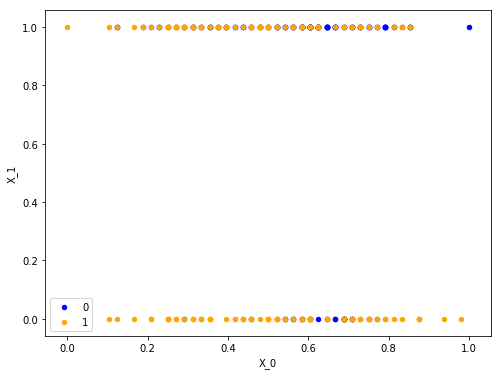

In [22]:
from matplotlib import pyplot as plt
from pandas import DataFrame 
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))
colors = {0:'blue', 1:'orange'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.xlabel('X_0')
plt.ylabel('X_1')
plt.show()

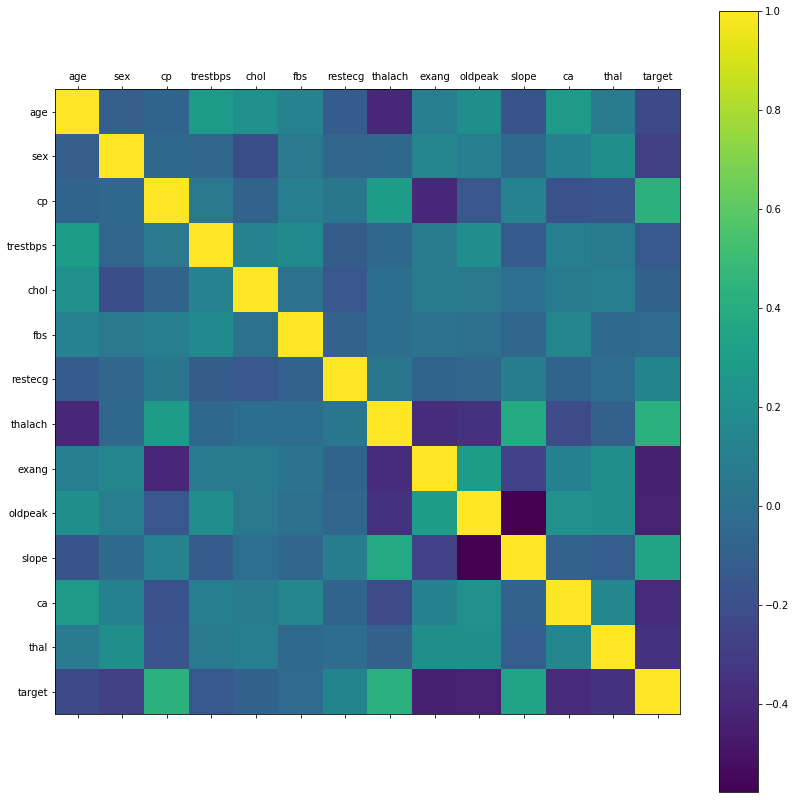

In [23]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(values.corr())
plt.yticks(np.arange(values.shape[1]), values.columns)
plt.xticks(np.arange(values.shape[1]), values.columns)
plt.colorbar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028FA612F860>,
      dtype=object)

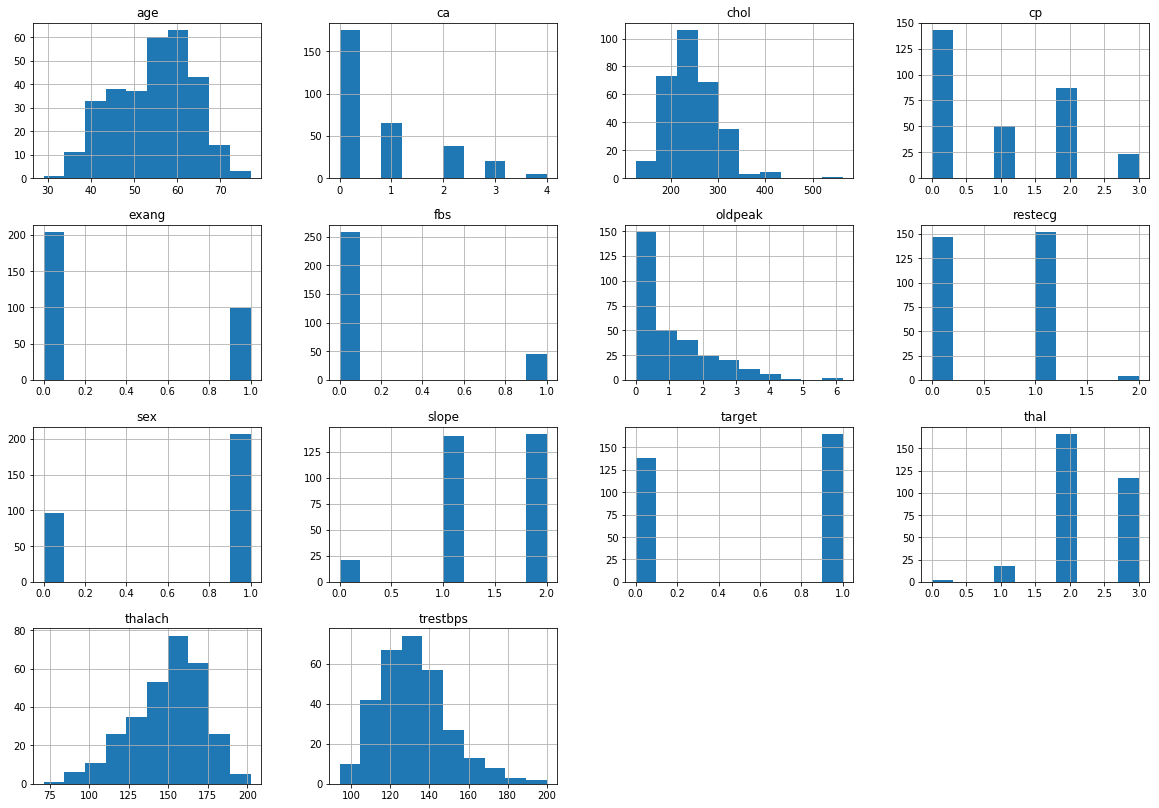

In [24]:
values.hist()

Text(0.5,1,'Count of each Target Class')

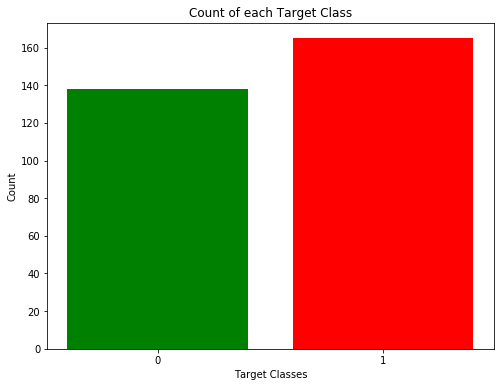

In [25]:
rcParams['figure.figsize'] = 8,6
plt.bar(values['target'].unique(), values['target'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

## Logistic Model

In [26]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [27]:
def hx(w,X):
    z=np.array(w[0])
    for i in range(len(w)-1):
        z = z + w[i+1]*np.array(X[:,i])
    return sigmoid(z)

## Cost Function - Binary Cross Entropy

In [28]:
def cost(w, X, Y):
    y_pred = hx(w,X)
    return -1 * sum(Y*np.log(y_pred) + (1-Y)*np.log(1-y_pred))

## Gradient Descent

In [29]:
def grad(w, X, Y):
    y_pred = hx(w,X)
    g = [0]*13
    g[0] = -1 * sum(Y*(1-y_pred) - (1-Y)*y_pred)
    for j in range(10):
        g[j+1] = -1 * sum(Y*(1-y_pred)*X[:,j] - (1-Y)*y_pred*X[:,j])
    return g

In [30]:
def descent(w_new, w_prev, lr):
    print(w_prev)
    print(cost(w_prev, X, Y))
    wT=0
    for x in range(1000):
        print('iteration=',x,'\n')
        w_prev = w_new
        wn = [0]*13
        for j in range(11):
            wn[j] = w_prev[j] - lr*grad(w_prev, X, Y)[j]
            w_new = wn
        print(w_new)
        print(cost(w_new, X, Y))
        
        for k in range(len(w)):
            wT=wT+(w_new[k]-w_prev[k])**2 
        
        if (wT <0.0000001):
            return w_new
        
        wT=0
    return w_new
        

## Initializing Parameters

In [31]:
w=np.ones(12,np.dtype(np.int16))

## Training the Model

In [32]:
w = descent(w,w,.0099)
print(w)

[1 1 1 1 1 1 1 1 1 1 1 1]
763.9702898519012
iteration= 0 

[-0.34575572581021197, 0.2246426267709305, -0.11977868617362697, 0.7873966655703085, 0.48569519363386193, 0.615251706487035, 0.7831127534527595, 0.6975689452575284, 0.3018189254560558, 0.2512695968619252, 0.6535776175472778, 0, 0]
230.97969536193835
iteration= 1 

[-0.851802709994704, -0.11631943671375072, -0.6424734363219673, 0.7971303246399328, 0.2546611606551147, 0.45642611486176976, 0.6363768583884188, 0.5957216733029783, 0.10479097096307494, -0.22793778141621607, 0.43658678212218227, 0, 0]
205.2883441836182
iteration= 2 

[-0.329507846295482, 0.09272601400596858, -0.37663246391251937, 1.1073366786319983, 0.39283111073988186, 0.5792115420395239, 0.6432864474258134, 0.7602209877890649, 0.5132996076761022, -0.28980956870445335, 0.4068685383553609, 0, 0]
189.08080282159605
iteration= 3 

[-0.6576028241359797, -0.14430832762390775, -0.727131040911517, 1.1200462269965568, 0.22814046028554325, 0.470514220962306, 0.527794061929030

[0.16932879357505048, -0.8573502237952312, -1.3743098799244928, 2.200309412157062, -0.5126447183133327, 0.19566336038610235, -0.06700523501206108, 1.0145070059012837, 2.1093678934651656, -1.179125605970392, -1.833143769090685, 0, 0]
129.72466859880512
iteration= 42 

[0.17809188828190906, -0.868746359491764, -1.3819967631572243, 2.206857068634625, -0.5271307027715344, 0.18708672917696315, -0.06882107194740081, 1.015205442194405, 2.130430714218862, -1.1744251863327746, -1.8685384402726786, 0, 0]
129.49311123067898
iteration= 43 

[0.18670026421548233, -0.8798291669618705, -1.3894605440294945, 2.213185182873142, -0.5413850351902876, 0.17853827252820764, -0.07044361215491432, 1.0158003470458759, 2.1510206280978426, -1.1697870715999321, -1.903328160418831, 0, 0]
129.27019422180936
iteration= 44 

[0.1951600181372671, -0.8906074439249342, -1.3967128163195601, 2.2193073314056297, -0.555413013549868, 0.17001865113429626, -0.07188692739849004, 1.016297862738717, 2.1711532946673513, -1.16521655

[0.42119995584686865, -1.1240455082024665, -1.5665855806230766, 2.3585068629432877, -0.9273311000914221, -0.10102709583992754, -0.07159053464134016, 1.0025757702966342, 2.6595342338478436, -1.0542800247009956, -2.828696153409475, 0, 0]
124.78774812065377
iteration= 79 

[0.4265355281802427, -1.1280805460631125, -1.5701695283410395, 2.3614338555826944, -0.9358621635264771, -0.10845844413636577, -0.07104561325088155, 1.0017575989348904, 2.66968935411659, -1.0521024127449765, -2.848706377208785, 0, 0]
124.717182188458
iteration= 80 

[0.43181471578920483, -1.1320006833016532, -1.5737006180468485, 2.3643205603073794, -0.9442859280126525, -0.11586059015312494, -0.07049641681935886, 1.0009318890498855, 2.6796677105345017, -1.0499701355850957, -2.8684408916912085, 0, 0]
124.64852611070636
iteration= 81 

[0.43703857513438454, -1.1358088548185248, -1.5771801937613827, 2.3671681326157326, -0.9526043454393157, -0.12323370666374814, -0.0699439061455858, 1.0000993724596583, 2.689473179881328, -1.0

[0.5951250758676911, -1.2176198524729296, -1.6760927051353782, 2.4499582468733663, -1.1950745551129982, -0.37066740289138833, -0.05198459116328436, 0.9693521086756305, 2.9529189292664344, -0.9942101122349626, -3.442699154763365, 0, 0]
123.02191346752265
iteration= 118 

[0.5988335433198101, -1.218772072838401, -1.6782674031530351, 2.4518264435526262, -1.2005193904012494, -0.37707341848201614, -0.05158818114486209, 0.9685359563379764, 2.958307481656092, -0.9931527188070934, -3.45482599026574, 0, 0]
122.99458403222394
iteration= 119 

[0.6025115350585125, -1.2198810518227532, -1.680417512138098, 2.453675588195439, -1.2059071505312686, -0.38345572772623177, -0.05119791030013356, 0.9677234887244324, 2.9636154840594964, -0.992112250902636, -3.4668088519864804, 0, 0]
122.96783657618117
iteration= 120 

[0.6061594593747028, -1.22094783764212, -1.6825434165595876, 2.4555059205493532, -1.211238639750857, -0.38981443650830955, -0.05081374161261691, 0.9669147556906976, 2.9688444130595273, -0.9910

[0.7366549812158125, -1.238422697456828, -1.754072056397897, 2.5179224893103926, -1.3930424648654234, -0.636806799686919, -0.039408137209269646, 0.9364912664635875, 3.13267179482206, -0.9593473899650368, -3.8711172687361186, 0, 0]
122.20439887924552
iteration= 163 

[0.7393079356066634, -1.2383858461338384, -1.7554315095105448, 2.5191140256800426, -1.3965379135833753, -0.6422360591337869, -0.03922857279374871, 0.9358483573645693, 3.1355406705846782, -0.9587942797076288, -3.878418400267896, 0, 0]
122.19290382611683
iteration= 164 

[0.7419430978197944, -1.2383349740387337, -1.7567779934779995, 2.520293820167655, -1.4000010997023618, -0.6476454381185353, -0.03905236352236036, 0.9352089246855703, 3.1383725334612853, -0.9582483109909158, -3.8856418091059406, 0, 0]
122.18160459610942
iteration= 165 

[0.7445606552361218, -1.2382704456718676, -1.7581116769058038, 2.5214619886176517, -1.4034323890551597, -0.6530350072886727, -0.03887945323840612, 0.934572941662104, 3.1411679776136348, -0.9577

[0.8447093316275626, -1.2262440580846614, -1.806272238587162, 2.5629171017568235, -1.527547345362812, -0.8715777527312791, -0.033817607703271, 0.9096052406441607, 3.235473135857244, -0.9395398869971462, -4.143695628383916, 0, 0]
121.82306658026026
iteration= 210 

[0.8466902546047609, -1.225838313352776, -1.807168712534061, 2.5636649774521665, -1.5298489178836936, -0.8761438527622943, -0.033746862153699764, 0.9090978303850504, 3.2371004446369285, -0.9392273973168923, -4.148192470348953, 0, 0]
121.81754798841467
iteration= 211 

[0.8486598014861191, -1.2254292853721813, -1.8080579115043314, 2.5644054746210814, -1.532130877385214, -0.880693071144599, -0.03367759260026586, 0.9085927474290356, 3.238709731182949, -0.938918463921923, -4.15264469135656, 0, 0]
121.8121070734714
iteration= 212 

[0.85061806879645, -1.225017102210343, -1.8089399188818227, 2.5651386661469, -1.534393417195974, -0.8852254661236453, -0.03360977316570866, 0.9080899722362045, 3.2403012544695686, -0.9386130392658868, -

[0.9127199641879801, -1.209414846627896, -1.8358490835779837, 2.5867152511357703, -1.6026940653249409, -1.0336997959134684, -0.03197844970031155, 0.8918114461253424, 3.2865450407973458, -0.9298151157213016, -4.28694508431777, 0, 0]
121.6582330203197
iteration= 248 

[0.9143274292977815, -1.2089542067872328, -1.8365190352257572, 2.5872284882476624, -1.6043689133359353, -1.037663834747315, -0.031948903281865025, 0.8913805969090653, 3.2876385065264335, -0.9296099458617866, -4.290045893444626, 0, 0]
121.65490336697522
iteration= 249 

[0.9159264702452832, -1.2084935712065508, -1.8371841899655164, 2.587736671450589, -1.6060301144685205, -1.041613081995747, -0.03192011034545294, 0.8909514830606664, 3.2887213409621427, -0.9294069656375591, -4.293117058272005, 0, 0]
121.65161493603516
iteration= 250 

[0.9175171484624289, -1.2080329926689783, -1.8378445972764712, 2.5882398509068363, -1.6076777939252742, -1.045547589447955, -0.03189205764852507, 0.8905240926730135, 3.2897936844485995, -0.929206

[0.9736180028957468, -1.1905529314298686, -1.8603596286202315, 2.6044437070156885, -1.6625887617126864, -1.1880312311614318, -0.03125671654916008, 0.8750891844769629, 3.324714036872807, -0.9228171672168781, -4.394815575572758, 0, 0]
121.54772463070783
iteration= 290 

[0.9749178178635194, -1.190125635699628, -1.8608642108422053, 2.6047826459402943, -1.6637846216383312, -1.191416860804824, -0.031249640259899444, 0.8747225549785503, 3.325460585917288, -0.9226849051947119, -4.396899269770185, 0, 0]
121.5456913538903
iteration= 291 

[0.9762113077732936, -1.1896996996738318, -1.861365610288793, 2.605118258760406, -1.6649711146895343, -1.1947897436143582, -0.031242918558980124, 0.8743572737379757, 3.3262008915985795, -0.9225539851330856, -4.398963603129274, 0, 0]
121.5436804667548
iteration= 292 

[0.9774985127308907, -1.1892751394613374, -1.861863855953397, 2.605450578353187, -1.6661483222462157, -1.1981499251197556, -0.0312365450084157, 0.8739933338036561, 3.3269350285697934, -0.922424392

121.48262063483779
iteration= 329 

[1.0210421642854006, -1.1746379315632447, -1.878317722752988, 2.615703580539506, -1.7038540094275403, -1.3139509095739528, -0.031195381361661768, 0.8614135928651987, 3.350355695779212, -0.918441185640945, -4.464771960030872, 0, 0]
121.48127561014773
iteration= 330 

[1.0221169747888788, -1.174273134034164, -1.8787145486005514, 2.6159321364745693, -1.704731582400796, -1.316860799957892, -0.031198381715040985, 0.86109616485402, 3.3509015047836406, -0.9183525733606253, -4.4662116181055245, 0, 0]
121.47994416064934
iteration= 331 

[1.0231868154363015, -1.1739100116646064, -1.8791091204285386, 2.616158453591845, -1.7056025040214007, -1.3197596565907919, -0.03120154751490167, 0.8607798588561915, 3.3514433631963794, -0.9182648284738383, -4.467638152534919, 0, 0]
121.4786261228086
iteration= 332 

[1.024251714553117, -1.1735485658601903, -1.8795014564082988, 2.616382553845537, -1.7064668299274548, -1.3226475195376393, -0.03120487546417272, 0.860464670297175

[1.0784250158601447, -1.1554098352678075, -1.898962158794902, 2.6262360615630618, -1.7469779659909797, -1.472638010339991, -0.031586263195839626, 0.8439568110312604, 3.377695246073047, -0.91434204507998, -4.532480218566639, 0, 0]
121.41982672689343
iteration= 391 

[1.0792414706694315, -1.15514388808486, -1.8992486922774052, 2.62636136277752, -1.7475356561238313, -1.4749436162652119, -0.03159488703168253, 0.8437006174809576, 3.3780609844071234, -0.9142928084375189, -4.533308529733596, 0, 0]
121.4190860053742
iteration= 392 

[1.080054343986918, -1.1548794335836108, -1.8995337909310623, 2.626485432296775, -1.7480893153523196, -1.4772404042019394, -0.03160354895143347, 0.8434453216098062, 3.3784245643765076, -0.9142440348572366, -4.534129438487098, 0, 0]
121.41835204437656
iteration= 393 

[1.0808636539247871, -1.1546164661358427, -1.8998174644099164, 2.626608282062022, -1.7486389759216872, -1.4795284068010963, -0.03161224776668958, 0.8431909204037281, 3.3787860052759147, -0.914195719734

[1.1158473744083828, -1.143625956701712, -1.9119264059428625, 2.63127791137905, -1.770888244525354, -1.579633658211002, -0.032054246817900596, 0.8319760162717267, 3.393946074741493, -0.9123365949822488, -4.56655433832679, 0, 0]
121.38939632385197
iteration= 442 

[1.1165020152566794, -1.1434284768944467, -1.9121504045370343, 2.6313534448109497, -1.7712762573109548, -1.5815289202867076, -0.03206364752249438, 0.8317620281375333, 3.3942221692468255, -0.9123060031462874, -4.567079793297492, 0, 0]
121.38892611716275
iteration= 443 

[1.117153865502759, -1.143232178929503, -1.9123733633472344, 2.6314282277164702, -1.7716615764280388, -1.5834168931056196, -0.0320730458148629, 0.831548799479217, 3.394496848043406, -0.9122756920711446, -4.567600605840077, 0, 0]
121.38845997425182
iteration= 444 

[1.1178029383203063, -1.1430370566416561, -1.9125952884920012, 2.6315022673338526, -1.7720442227375912, -1.5852976039937063, -0.03208244121491503, 0.831336327844574, 3.394770121794841, -0.9122456590631

121.37477653537326
iteration= 478 

[1.1383080783347006, -1.1370592232408347, -1.9195662817976498, 2.63362469192747, -1.7836019511777912, -1.6451097778791524, -0.03239727136591816, 0.8245457217156541, 3.403294508727424, -0.9113724426589128, -4.583205723964414, 0, 0]
121.37443104067913
iteration= 479 

[1.1388676809478897, -1.1369014669919295, -1.9197555238050525, 2.63367677436207, -1.783902933202228, -1.6467528049278466, -0.032406324302174085, 0.8243582600582904, 3.4035245132488225, -0.9113506397152872, -4.58358452150505, 0, 0]
121.3740884524665
iteration= 480 

[1.139424933547306, -1.1367446738865843, -1.9199439225914838, 2.633728332323616, -1.784201888439136, -1.6483894916743658, -0.0324153620695171, 0.8241714720895903, 3.4037534298114434, -0.9113290340113752, -4.583959994394156, 0, 0]
121.37374874444589
iteration= 481 

[1.1399798468251359, -1.136588838354436, -1.920131482723797, 2.633779370867328, -1.7844988322271667, -1.6500198620609952, -0.03242438444073794, 0.8239853556201511, 3

iteration= 520 

[1.1599046249252143, -1.1312012206478856, -1.926837320383292, 2.6354135584249585, -1.7946610361874378, -1.7089233631075245, -0.03276232183432695, 0.8172279201508764, 3.412093702736703, -0.910607148664716, -4.5965655101991, 0, 0]
121.36225068731426
iteration= 521 

[1.1603741115708768, -1.1310793729622617, -1.9269947234788933, 2.635447457100145, -1.794888771601617, -1.710319753427635, -0.032770591297349515, 0.8170669370933612, 3.412283510258206, -0.9105922234024998, -4.5968274067959145, 0, 0]
121.36200938924027
iteration= 522 

[1.1608416517867846, -1.130958273653988, -1.9271514493754982, 2.635481006748431, -1.795115027772037, -1.7117107379636527, -0.03277883954861909, 0.8169065408517875, 3.4124724810487326, -0.910577431266307, -4.5970870196787486, 0, 0]
121.36177007496066
iteration= 523 

[1.1613072541505614, -1.1308379181070924, -1.9273075014646328, 2.6355142107439957, -1.7953398155958948, -1.71309633727064, -0.03278706651394875, 0.8167467294780044, 3.412660619983468,

[1.1885009351341391, -1.1242476345001302, -1.936387293059867, 2.6371021288391643, -1.8075547107103784, -1.7946749794872459, -0.033287767521626564, 0.8072743613088976, 3.4235925379692436, -0.9098261311402899, -4.610342187703199, 0, 0]
121.34934149809229
iteration= 591 

[1.1888527431680391, -1.1241682753909727, -1.936504412511297, 2.6371182327024325, -1.8077010399989464, -1.7957387155760332, -0.03329447879845961, 0.8071500312472321, 3.423733600872431, -0.9098181069955151, -4.610484481626426, 0, 0]
121.34920513647945
iteration= 592 

[1.1892031138625223, -1.1240893958664466, -1.9366210471801761, 2.6371341604865957, -1.8078464770437788, -1.796798316450244, -0.03330116793403033, 0.8070261638652437, 3.4238740875391, -0.9098101529320545, -4.6106255469746005, 0, 0]
121.34906987072556
iteration= 593 

[1.1895520533240063, -1.1240109928320914, -1.936737199273487, 2.637149913918983, -1.807991028105388, -1.7978537979761842, -0.03330783495661894, 0.8069027575613485, 3.424014000774922, -0.909802268

[1.2097007131168909, -1.1197503526735353, -1.9434371034941018, 2.6378781098849418, -1.8158484177041343, -1.8591539737569927, -0.03370085801181761, 0.7997010391282744, 3.4321060782737924, -0.9094082407963395, -4.617768911177994, 0, 0]
121.34208967191196
iteration= 660 

[1.2099663064994697, -1.1196977498543312, -1.9435253730218698, 2.6378853759801846, -1.8159456382208163, -1.8599666753360917, -0.03370613472475129, 0.7996051127191702, 3.43221308529223, -0.9094038330020894, -4.617847363174743, 0, 0]
121.3420112483439
iteration= 661 

[1.210230824627591, -1.1196454532978102, -1.9436132852093977, 2.6378925536878772, -1.816042302961234, -1.8607762080230055, -0.03371139231764118, 0.7995095489428069, 3.4323196723694114, -0.9093994628945364, -4.617925144626277, 0, 0]
121.34193344768076
iteration= 662 

[1.2104942719664067, -1.1195934610217824, -1.9437008415891783, 2.637899643900907, -1.8161384156204716, -1.8615825840562517, -0.03371663084326357, 0.7994143464989155, 3.4324258413224773, -0.909395

[1.2199789765700966, -1.1177833770809382, -1.946853536439419, 2.6381165450300186, -1.819492666438262, -1.8906944812567645, -0.03390663137413826, 0.7959698796373165, 3.4362585879234695, -0.9092520377547227, -4.620548157089761, 0, 0]
121.33927893640872
iteration= 702 

[1.2202030381298, -1.1177420729937428, -1.946928035137864, 2.63812077815164, -1.8195694323714757, -1.8913841136728038, -0.03391115120204132, 0.7958881102144235, 3.4363494134118393, -0.9092489566390036, -4.620602927954584, 0, 0]
121.33922279245115
iteration= 703 

[1.2204261960769753, -1.1177010023651877, -1.9470022348426719, 2.6381249538906784, -1.81964577631476, -1.8920710532248146, -0.03391565416900454, 0.7958066522323265, 3.436439887361499, -0.909245901476362, -4.620657233910409, 0, 0]
121.33916709259391
iteration= 704 

[1.220648454127841, -1.1176601637007926, -1.9470761368052798, 2.6381290728431823, -1.8197217009755282, -1.892755310345247, -0.03392014032885999, 0.7957255045549705, 3.436530011224236, -0.909242872038301

[1.229217605823255, -1.1161360376745777, -1.9499269001612258, 2.638257892690109, -1.8225650247570884, -1.9192042969852292, -0.03409408697744782, 0.7925830054514335, 3.440017282904549, -0.9091361233172649, -4.622604824514523, 0, 0]
121.33714580447898
iteration= 747 

[1.229404467368358, -1.1161038936204153, -1.9499891048505733, 2.6382600598057544, -1.822625223476325, -1.9197825361254088, -0.03409790051941196, 0.7925141776984831, 3.440093629905163, -0.9091340104382994, -4.622642203210643, 0, 0]
121.33710650941227
iteration= 748 

[1.2295905776905456, -1.1160719248899602, -1.9500510615186102, 2.638262191381767, -1.8226851045545909, -1.920358514533306, -0.03410169955826676, 0.792445613825322, 3.4401696841369267, -0.9091319150216465, -4.622679267288859, 0, 0]
121.33706752427034
iteration= 749 

[1.2297759398549442, -1.116040130383, -1.9501127711840058, 2.638264287803103, -1.8227446699496774, -1.9209322409913063, -0.034105484144394405, 0.792377312854727, 3.440245446768431, -0.909129836914898

[1.2351672186247067, -1.1151352458563286, -1.9519086113741109, 2.638313776082883, -1.8244446870885345, -1.9376471849343961, -0.03421590753211001, 0.7903852024959438, 3.442455590628284, -0.9090732295489017, -4.623714379352355, 0, 0]
121.33596979360904
iteration= 781 

[1.2353301831840093, -1.1151084880683244, -1.951962928729211, 2.638314929937109, -1.824495106280646, -1.9381532904803465, -0.03421925556575106, 0.7903248179266986, 3.442522608449717, -0.9090716324816674, -4.623742449366686, 0, 0]
121.33593976716215
iteration= 782 

[1.235492493800157, -1.1150818721021638, -1.9520170302890019, 2.638316059434659, -1.8245452672379194, -1.938657415751902, -0.03422259074571334, 0.7902646658247332, 3.4425893704139376, -0.9090700483887647, -4.623770284818395, 0, 0]
121.33590997718807
iteration= 783 

[1.235654153128864, -1.1150553970851877, -1.952070916930489, 2.6383171648510304, -1.8245951715029889, -1.9391595684552847, -0.03422591311841355, 0.7902047453209671, 3.4426558775244627, -0.90906847715

iteration= 819 

[1.2410616489512616, -1.1141892707430878, -1.953874796921408, 2.638343036443843, -1.8262329513937783, -1.95598597073975, -0.03433737005222723, 0.788194764102078, 3.444888521344668, -0.9090196072094604, -4.62465233459728, 0, 0]
121.33495805367504
iteration= 820 

[1.2412009800052377, -1.1141674482117832, -1.9539213148985473, 2.638343421682174, -1.8262743516157933, -1.9564202940263378, -0.03434025002632376, 0.7881428287318051, 3.444946266393598, -0.9090184412269574, -4.624672599717451, 0, 0]
121.33493599054528
iteration= 821 

[1.2413397528892414, -1.114145737498899, -1.953967648633202, 2.6383437915110295, -1.8263155465740513, -1.9568529166089585, -0.034343118862491744, 0.7880910940998834, 3.445003791700603, -0.9090172844961415, -4.624692697079322, 0, 0]
121.33491410096899
iteration= 822 

[1.2414779698602736, -1.114124137934438, -1.9540137988673238, 2.638344146116936, -1.8263565374509034, -1.9572838451170442, -0.03434597660214394, 0.7880395594489884, 3.4450610981157475,

[1.2475006249071603, -1.1132059917004844, -1.9560270057343672, 2.6383464911589583, -1.8281054279744158, -1.9760999463976427, -0.03447087814414391, 0.7857868853709126, 3.4475702093446237, -0.9089704436510444, -4.625498911367976, 0, 0]
121.334028122185
iteration= 871 

[1.247614182095912, -1.1131891039763897, -1.9560650115737501, 2.6383462933549753, -1.8281377162520762, -1.9764554768891973, -0.03447324021293093, 0.7857442762205092, 3.4476177621717916, -0.908969661290903, -4.625512212447303, 0, 0]
121.33401337054414
iteration= 872 

[1.2477272851091232, -1.113172299031906, -1.956102867303011, 2.638346087595143, -1.8281698506030792, -1.9768096140868396, -0.034475593093017794, 0.7857018324563957, 3.4476651344600726, -0.9089688849042098, -4.62552540498365, 0, 0]
121.33399873482986
iteration= 873 

[1.2478399357753696, -1.1131555763904355, -1.956140573521559, 2.638345873989902, -1.82820183187287, -1.977162363431445, -0.034477936819376394, 0.785659553448623, 3.4477123269002625, -0.908968114440

121.33348805777759
iteration= 914 

[1.2520907253057234, -1.1125353321226923, -1.9575648729568165, 2.6383315792408113, -1.8293909995008648, -1.99049451461103, -0.034566563653775265, 0.7840604988395673, 3.449500532744503, -0.908941055976476, -4.625992637988443, 0, 0]
121.33347754920139
iteration= 915 

[1.2521859335490706, -1.112521674539057, -1.9575968096810716, 2.6383311220021612, -1.8294172480367183, -1.9907936186546122, -0.034568552933278374, 0.7840246001675073, 3.449540760568337, -0.9089404939063492, -4.6260019359208275, 0, 0]
121.33346712316582
iteration= 916 

[1.2522807613899494, -1.1125080814588597, -1.95762862046899, 2.6383306607111345, -1.829443375200107, -1.9910915498863202, -0.03457053445168968, 0.7839888412394033, 3.449580835804237, -0.9089399359530752, -4.626011159064995, 0, 0]
121.33345677902182
iteration= 917 

[1.2523752103556351, -1.1124945525244982, -1.9576603058209385, 2.6383301954367138, -1.82946938163147, -1.9913883128917154, -0.03457250823890418, 0.78395322151948

## Visualizing the Result

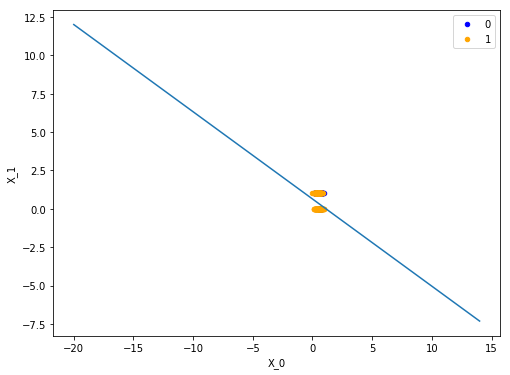

In [33]:
def graph(formula, x_range):  
    x = np.array(x_range)  
    y = formula(x)  
    plt.plot(x, y)  
    
def my_formula(x):
    return (-w[0]-w[1]*x)/w[2]

from matplotlib import pyplot as plt
from pandas import DataFrame 
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))
colors = {0:'blue', 1:'orange'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
graph(my_formula, range(-20,15))
plt.xlabel('X_0')
plt.ylabel('X_1')
plt.show()